In [2]:
import sys
sys.executable

'/opt/miniconda3/bin/python3'

In [420]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rng
from matplotlib.colors import ListedColormap
import matplotlib
from  matplotlib.animation import FuncAnimation
from IPython.display import HTML
import scipy.interpolate as inter
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [4]:
"""EXERCISE 1"""
# Uniform Lattice creation
def normallattice(N, M, value=0):
    '''
    This function returns an N (rows) x M (columns) lattice with identical values value
    '''
    return np.full((N, M), value)

def alternatinglattice(N):
    '''
    returns an alternating square array of 1 and -1
    '''
    alternating = np.tile([[1, -1],[-1, 1]], (N, N))
    return alternating

# Random Lattice creation
def randomlattice(N, M):
    '''
    This function returns an N (rows) x M (columns) lattice with randomized spin values -1 or 1
    '''
    return rng.choice((-1, 1), (N, M))

def continuouslattice(N, M):
    return np.random.rand(N, M)

# Draw your lattice
def plotlattice(array, color = 0 , axis_indexing = 0):
    dim = np.shape(array)
    nrows, ncols = dim[0], dim[1]
    image = array
    if axis_indexing == 1:
        row_labels = list(range(nrows))
        col_labels = list(range(ncols))
    elif axis_indexing == 2:
        row_labels = list(map(chr, range(97, 97 + nrows)))
        col_labels = list(map(chr, range(97, 97 + ncols)))
    else:
        row_labels = []
        col_labels = []
    if color == 0:
        plt.matshow(image, cmap = plt.cm.gray_r)
    elif color == 1:
        plt.matshow(image, cmap = plt.cm.magma)
    elif color == 2:
        plt.matshow(image, cmap = plt.cm.Spectral_r)
    plt.xticks(range(ncols), col_labels)
    plt.yticks(range(nrows), row_labels)
    plt.show()

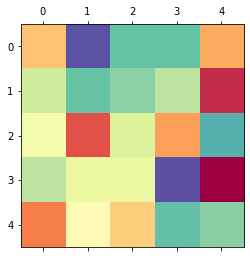

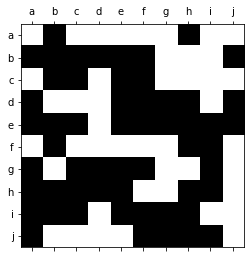

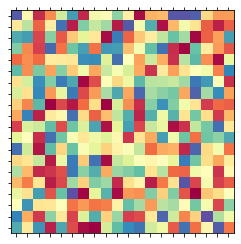

In [5]:
array = continuouslattice(5, 5)
plotlattice(array, 2, 1)

boring_large_array = randomlattice(10, 10)
plotlattice(boring_large_array, 0, 2)

fun_large_array = continuouslattice(20, 20)
plotlattice(fun_large_array, 2, 0)

In [6]:
"""EXERCISE 2"""
def chooseParticle(array):
    dim = np.shape(array)
    nrows, ncols = dim[0], dim[1]
    rrow = np.random.randint(0, nrows)
    rcol = np.random.randint(0, ncols)
    return (rrow, rcol)

def flipParticle(particle, array):
    new_array = np.copy(array)
    i = particle[0]
    j = particle[1]
    new_array[i][j] *= -1
    return new_array

In [7]:
"""EXERCISE 3"""
def periodicBound(lattice, i, j):
    dim = np.shape(lattice)
    ind_row = dim[0] - 1
    ind_col = dim[1] - 1
    if i <= ind_row and j <= ind_col:
        return lattice[i][j]
    else:
        wrap_i = i % (ind_row + 1)
        wrap_j = j % (ind_col + 1)
        return lattice[wrap_i][wrap_j]

In [8]:
def neighbourSum(lattice, point):
    i = point[0]
    j = point[1]
    latticesum = 0
    
    latticesum += periodicBound(lattice, i+1, j)
    latticesum += periodicBound(lattice, i-1, j)
    latticesum += periodicBound(lattice, i, j+1)
    latticesum += periodicBound(lattice, i, j-1)
    
    return latticesum

In [9]:
test_lattice = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [10]:
neighbourSum(test_lattice, (0,0))

16

In [11]:
"""Pulled off the internet, with modifications to make it work for this data/added functionality."""

def heatmap(array, axis_indexing = 1, color_scheme = 0):
    #if not ax:
    #    ax = plt.gca()
    
    if axis_indexing == 1:
        row_labels = range(array.shape[0])
        col_labels = range(array.shape[1])
        ax.set_xticks(np.arange(array.shape[1]))
        ax.set_yticks(np.arange(array.shape[0]))
        ax.set_xticklabels(col_labels)
        ax.set_yticklabels(row_labels)
    elif axis_indexing == 2:
        row_labels = list(map(chr, range(97, 97 + array.shape[0])))
        col_labels = list(map(chr, range(97, 97 + array.shape[1])))
        row_labels.reverse()
        ax.set_xticks(np.arange(array.shape[1]))
        ax.set_yticks(np.arange(array.shape[0]))
        ax.set_xticklabels(col_labels)
        ax.set_yticklabels(row_labels)
    else:
        row_labels = []
        col_labels = []
        ax.set_xticklabels(col_labels)
        ax.set_yticklabels(row_labels)
    
    if color_scheme == 0:
        im = ax.imshow(array, cmap = plt.cm.gray_r)
    elif color_scheme == 1:
        im = ax.imshow(array, cmap = plt.cm.magma)
    elif color_scheme == 2:
        im = ax.imshow(array, cmap = plt.cm.Spectral_r)

    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(array.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(array.shape[0]+1)-.5, minor=True)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im


def annotate_heatmap(im, array, valfmt="{x:.0f}", textcolors=["black", "white"], threshold=None):

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(array.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the array and create a `Text` for each "pixel".
    # Change the text's color depending on the array.
    texts = []
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            kw.update(color=textcolors[int(im.norm(array[i, j]) < threshold)])
            text = im.axes.text(j, i, valfmt(array[i, j], None), **kw)
            texts.append(text)

    return texts

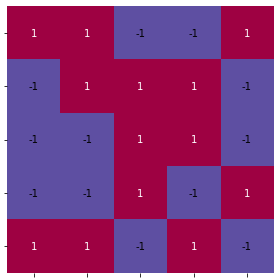

In [12]:
test_array = randomlattice(5, 5)    

fig, ax = plt.subplots()

image = heatmap(test_array, axis_indexing = 0, color_scheme = 2)
texts = annotate_heatmap(image, test_array, valfmt = "{x:.0f}", threshold = 0, textcolors=["white", "black"])

fig.tight_layout()
plt.show()

In [13]:
def neighbourlattice(array):
    sumlattice = np.zeros(array.shape)
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            point = (i, j)
            elem = neighbourSum(array, point)
            sumlattice[i, j] = elem
    return sumlattice

In [14]:
"""TEST ARRAYS"""
smalltestarray = randomlattice(5, 5)
smallsumarray = neighbourlattice(smalltestarray)

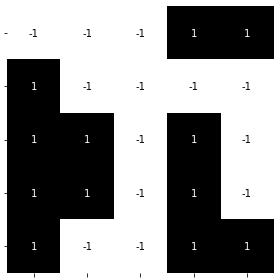

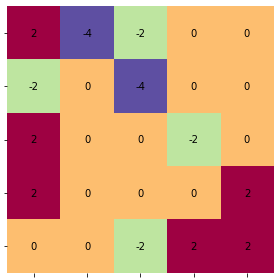

In [15]:
"""TEST OF NEIGHBOURLATTICE FUNCTION"""
fig, ax = plt.subplots()

image = heatmap(smalltestarray, axis_indexing = 0, color_scheme = 0)
texts = annotate_heatmap(image, smalltestarray, textcolors=['white', 'black'])

fig.tight_layout()
plt.show()

fig, ax = plt.subplots()

image = heatmap(smallsumarray, axis_indexing = 0, color_scheme = 2)
texts = annotate_heatmap(image, smallsumarray, textcolors=['black','black'])

fig.tight_layout()
plt.show()

In [16]:
"""EXERCISE 4"""
def localenergy(array, point, constJ = 1, constH = 1, roryIntuition = False):
    local_spin = neighbourSum(array, point)
    
    i, j = point[0], point[1]
    self_spin = array[i, j]
    local_interaction = self_spin * local_spin
    local_int_energy = -1 * constJ * local_interaction
    
    if roryIntuition == True: 
        local_neighbour_energy = -1 * constH * self_spin
    else:
        local_neighbour_energy = -1 * constH * local_spin
    
    local_energy = local_int_energy + local_neighbour_energy
    return local_energy

def totalenergy(array):
    total_energy = 0
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            point = (i, j)
            total_energy += localenergy(array, point)
    return total_energy

In [17]:
#random lattices
for i in range(5):
    energytest = randomlattice(7, 7)
    print(totalenergy(energytest))
    
#spin up lattices
for i in range(5):
    energytest = normallattice(7, 7, 1)
    print(totalenergy(energytest))

#spin down lattices
for i in range(5):
    energytest = normallattice(7, 7, -1)
    print(totalenergy(energytest))

#spin 0 lattices:
for i in range(5):
    energytest = normallattice(7, 7, 0)
    print(totalenergy(energytest))
    
    
"""
With J and H = 1, the random energies are all even, and both positive and negative. The spin ups are all -392...
the spin downs are all 0, and the spin 0 are also all zero.
"""

64
8
-24
-16
32
-392
-392
-392
-392
-392
0
0
0
0
0
0
0
0
0
0


'\nWith J and H = 1, the random energies are all even, and both positive and negative. The spin ups are all -392...\nthe spin downs are all 0, and the spin 0 are also all zero.\n'

In [18]:
"""EXERCISE 5"""
def magnetisation(array):
    totalM = np.sum(array)
    spinM = totalM / (array.shape[0] * array.shape[1])
    return totalM, spinM

In [19]:
test_mag = normallattice(5, 5, 1)

In [20]:
magnetisation(test_mag)

(25, 1.0)

In [21]:
perturb_mag = flipParticle((2,1), test_mag)
perturb_mag = flipParticle((3,2), perturb_mag)
perturb_mag = flipParticle((0,4), perturb_mag)

In [22]:
magnetisation(perturb_mag)

(19, 0.76)

In [23]:
"""EXERCISE 6"""

"""I feel like with the number of times I use array, I should make the lattice a class."""

"""PSEUDOCODE:
call randomlattice:
    assign randomlattice return value to variable array
    print array

def delta_energy(array, particle):
    call totalenergy on unperturbed lattice:
    store value as E1
    
    store new perturbed lattice with flip particle
    
    call totalenergy on perturbed lattice:
    store value as E2
    
    calculate and return E2-E1
    
def fliparoni(array, T):
        particle = choose random particle to flip with rng

        delta = delta_energy(array, particle)
        if delta < 0:
            flipParticle(particle, array)
        else:
            rng between 0 and 1
            pE = np.exp(-delta / (k * T))
            if r < pE:
                flipParticle(particle, array)
            else:
                pass
        return array

def simulate(array, T, N):
    for i in range(N):
        fliparoni(array, T)
    return array

"""

'PSEUDOCODE:\ncall randomlattice:\n    assign randomlattice return value to variable array\n    print array\n\ndef delta_energy(array, particle):\n    call totalenergy on unperturbed lattice:\n    store value as E1\n    \n    store new perturbed lattice with flip particle\n    \n    call totalenergy on perturbed lattice:\n    store value as E2\n    \n    calculate and return E2-E1\n    \ndef fliparoni(array, T):\n        particle = choose random particle to flip with rng\n\n        delta = delta_energy(array, particle)\n        if delta < 0:\n            flipParticle(particle, array)\n        else:\n            rng between 0 and 1\n            pE = np.exp(-delta / (k * T))\n            if r < pE:\n                flipParticle(particle, array)\n            else:\n                pass\n        return array\n\ndef simulate(array, T, N):\n    for i in range(N):\n        fliparoni(array, T)\n    return array\n\n'

In [285]:
def delta_energy(array, particle):
    E1 = localenergy(array, particle)
    
    delta = -2 * E1
    
    return delta
    
def fliparoni(array, T, debug = False):
        particle = chooseParticle(array)
        
        k = 1
        #k = 1.380649e-23 #(Boltzman constant in different units)
        
        if debug == True: print(particle)
        
        delta = delta_energy(array, particle)
        
        if debug == True: print(delta)
        
        if delta < 0:
            new_array = flipParticle(particle, array)
        else:
            r = np.random.uniform()
            pE = np.exp(-1 * delta / (k * T))
            if r < pE:
                new_array = flipParticle(particle, array)
            else:
                new_array = array
        return new_array

In [283]:
def plotsimulation(array, T, N): #plots start lattice and lattice after N steps at temp T
    plotlattice(array)
    loop_array = array
    for i in range(N):
        #plotlattice(loop_array)
        loop_array = fliparoni(loop_array, T)
    plotlattice(loop_array)
    return

def samplelattice(array, T, N): #for the animation function later on.
    data = []
    
    loop_array = array
    for i in range(N):
        data.append(loop_array)
        loop_array = fliparoni(loop_array, T)
    return data

"""def simulate(array, T, N): #the function that returns magnetisation and total energy for each of N steps
    observables = np.zeros((2, N))
    
    loop_array = array
    for i in range(N):
        mag = magnetisation(loop_array)
        observables[0][i] = mag[0]
        observables[1][i] = totalenergy(loop_array)
        loop_array = fliparoni(loop_array, T)
        
    return observables"""

def observe(array, total = False):
    magTuple = magnetisation(array)
    
    if total == False: 
        mag = magTuple[1] #assuming average spin
    elif total == True:
        mag = magTuple[0]
        
    energy = totalenergy(array)
    return mag, energy

def metropolis(array, T, N = 1000):
    differences = np.zeros((N, 2))
    measurables = np.zeros((N, 2))
    loop_array_initial = array
    for i in range(N):
        loop_array_final = fliparoni(loop_array_initial, T)
        val_initial = observe(loop_array_initial)
        val_final = observe(loop_array_final)
        measurables[i] = observe(loop_array_initial, total = False)
        differences[i] = np.subtract(val_final, val_initial)
        loop_array_initial = loop_array_final
    measurables[N-1] = observe(loop_array_final, total = False)
    return differences, measurables

In [278]:
simulationLattice = randomlattice(10, 10)

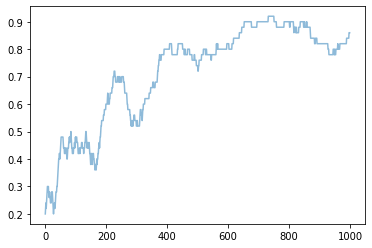

In [290]:
N = 1000
plotdata = metropolis(simulationLattice, 4, N)[1]
mag = plotdata[:,0]
plt.plot(list(range(N)), mag, alpha=0.5)
plt.show()
#energy.size

In [28]:
def animateplot(array, T, N, color_scheme = 0):

    data = samplelattice(simulationLattice, T, N)

    fig = plt.figure()
    
    if color_scheme == 0:
        color_map = plt.cm.gray_r
    else:
        color_map = plt.cm.magma
        
    plot = plt.imshow(data[0], cmap = color_map)

    def init():
        plot.set_data(data[0])
        return [plot]

    def update(j):
        plot.set_data(data[j])
        return [plot]


    anim = FuncAnimation(fig, update, init_func = init, frames= N, interval = 30, blit=True)
    
    return anim

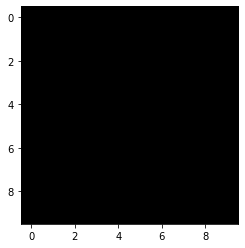

In [473]:
anim = animateplot(simulationLattice, 0.001, 500)
HTML(anim.to_html5_video())

In [56]:
"""EXERCISE 7: first attempt

def equilibriumTime(array_set): #returns first equilibrium time
    tEq = 0
    for array in array_set:
        bool_up_lattice = np.equal(array, np.ones(np.shape(array)))
        bool_down_lattice = np.equal(array, -1 * np.ones(np.shape(array)))

        if np.all(bool_up_lattice) or np.all(bool_down_lattice):
            return tEq
        else:
            tEq +=1
    if tEq == len(array_set):
        print("It is possible that the system did not reach equilibrium. It is recommended that you increase N to ensure equilibrium is reached.")
    return tEq

def generateNewArrays(array_set, T, diff):
    aug_array_set = array_set
    loop_array = array_set[-1]    
        
    print("Generating more matrices to meet nEq requirement.")
    for i in range(diff):
        aug_array_set.append(loop_array)
        loop_array = fliparoni(loop_array, T)        
    
    return aug_array_set

def calculateMeasurements(array_set, T, nEq, debug = False):
    #Note: this function somehow also appends original array_set, despite my best efforts. 
    tEq = equilibriumTime(array_set)
    N = len(array_set)
    
    tDiff = N - tEq
    
    if  nEq > tDiff:
        diff = nEq - tDiff
        fullSet = generateNewArrays(array_set, T, diff)
    else:
        fullSet = array_set[tEq : tEq + nEq]
    
    eqSet = array_set[tEq : tEq + nEq]
    
    measurements = np.zeros((2, nEq))
    for i in range(nEq):
        observation = observe(eqSet[i])
        measurements[0][i] += observation[0]
        measurements[1][i] += observation[1]
    
    if debug: print("Total samples:" + str(N))
    if debug: print("tEq:" + str(tEq))
    
    return measurements"""

'EXERCISE 7: first attempt\n\ndef equilibriumTime(array_set): #returns first equilibrium time\n    tEq = 0\n    for array in array_set:\n        bool_up_lattice = np.equal(array, np.ones(np.shape(array)))\n        bool_down_lattice = np.equal(array, -1 * np.ones(np.shape(array)))\n\n        if np.all(bool_up_lattice) or np.all(bool_down_lattice):\n            return tEq\n        else:\n            tEq +=1\n    if tEq == len(array_set):\n        print("It is possible that the system did not reach equilibrium. It is recommended that you increase N to ensure equilibrium is reached.")\n    return tEq\n\ndef generateNewArrays(array_set, T, diff):\n    aug_array_set = array_set\n    loop_array = array_set[-1]    \n        \n    print("Generating more matrices to meet nEq requirement.")\n    for i in range(diff):\n        aug_array_set.append(loop_array)\n        loop_array = fliparoni(loop_array, T)        \n    \n    return aug_array_set\n\ndef calculateMeasurements(array_set, T, nEq, debug

In [31]:
"""test_arraySet = []
for i in range(17):
    test_arraySet.append(alternatinglattice(1))
for i in range(8):
    test_arraySet.append(normallattice(2, 2, 1))

equilibriumTime(test_arraySet)
len(test_arraySet)

calculateMeasurements(test_arraySet, 10, 9)"""

Generating more matrices to meet nEq requirement.


array([[  4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.],
       [-32., -32., -32., -32., -32., -32., -32., -32., -32.]])

In [32]:
"""
O O O O O O O O O O O O O O O O O X X X X X X X X 
O is non-eq
X is eq

25 samples

17 non-eq
8 eq

suppose we want caculation with nEq = 5:
    find tEq
    calculate N - tEq (# of eq samples)
    if nEq < N - tEq
        access and store tEq to tEq + nEq arrays
suppose we want calculation with nEq = 10:
    find tEq
    calculate N - tEq
    nEq > N - tEq!!!!
        invoke generateNewArrays: needs last array in sample, T, nEq-(N-tEq)
"""


'\nO O O O O O O O O O O O O O O O O X X X X X X X X \nO is non-eq\nX is eq\n\n25 samples\n\n17 non-eq\n8 eq\n\nsuppose we want caculation with nEq = 5:\n    find tEq\n    calculate N - tEq (# of eq samples)\n    if nEq < N - tEq\n        access and store tEq to tEq + nEq arrays\nsuppose we want calculation with nEq = 10:\n    find tEq\n    calculate N - tEq\n    nEq > N - tEq!!!!\n        invoke generateNewArrays: needs last array in sample, T, nEq-(N-tEq)\n'

In [53]:
"""def averageMeasurements(array, T, nEq, N = 1000):
    array_set = samplelattice(realLattice, T, N)
    vals = calculateMeasurements(array_set, T, nEq)
    avgs = np.average(vals, axis = 1)
    return avgs""""

In [577]:
"""EXERCISE 7: FINAL ATTEMPT"""

"""There is a lot here, so I will summarize the results I found up here. The functions below return, through 
various steps, the specific heat, average magnetisation, and average energy of equilibriated systems at certain
or ranges of temperatures. There appears to be a phase transition around T = 5 (with k = 1). Additionally, the
value of speicific heat for the entire system (5x5 lattice) seems to vary with temperature and peaks around T=6 
with an average C value of 25 around that temperature."""

def eqTime(differences, tolerance_value, tolerance_slice):
    for i in range(len(differences)):
            value = np.average(differences[i: (i + tolerance_slice)])
            if value < tolerance_value:
                return i
            else:
                pass
    return "No equilibrium found."

def eqAverage(values, tEq, nEq):
    avgMeasure = np.average(values[tEq: tEq + nEq])
    return avgMeasure

def eqVariance(values, tEq, nEq):
    varMeasure = np.var(values[tEq: tEq + nEq])
    return varMeasure

def measurements(metro_vals, nEq = 100, tolerance_value = 0.001, tolerance_slice = 100):
    
    measurables = metro_vals[1]
    differences = metro_vals[0][:,0] #choosing equilibrium to be when energy change is negligible:
    
    
    tEq = eqTime(differences, tolerance_value, tolerance_slice)
    
    total_mag = measurables[:,0]
    total_energy = measurables[:,1]
    
    avg_mag = eqAverage(total_mag, tEq, nEq)
    avg_energy = eqAverage(total_energy, tEq, nEq)
    var_energy = eqVariance(total_energy, tEq, nEq)
    
    return avg_mag, avg_energy #, avg_c

def fullMeasurements(array, T, nEq = 100, tolerance_value = 0.001, tolerance_slice = 100, manual_eq = False):
    metro_vals = metropolis(array, T)

    measurables = metro_vals[1]
    differences = metro_vals[0][:,0] #choosing equilibrium to be when energy change is negligible:
    
    if manual_eq == False:
        tEq = eqTime(differences, tolerance_value, tolerance_slice)
    if manual_eq == True:
        tEq = 500
    
    total_mag = measurables[:,0]
    total_energy = measurables[:,1]
    
    avg_mag = eqAverage(total_mag, tEq, nEq)
    avg_energy = eqAverage(total_energy, tEq, nEq)
    var_energy = eqVariance(total_energy, tEq, nEq)
    specHeat = var_energy / (T**2)
    
    return avg_mag, avg_energy, specHeat

In [259]:
test_array_2 = randomlattice(5, 5)

In [267]:
measurements(metropolis(test_array_2, 10))

(24.86, -198.32)

In [447]:
#avg_M_series = []
#temps = np.linspace(1, 20, 100)
#for temp in temps:
#    vals = metropolis(test_array_2, T = temp, N = 300)
#    avg_M_series.append(measurements(vals)[0])
#print(avg_M_series)

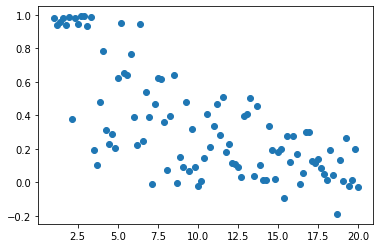

In [390]:
"""spl_avg_M_series = list(np.ones(1000))
spl_temps = list(np.linspace(0, 0.9999, 1000))

spl_M = np.hstack((spl_avg_M_series, avg_M_series))
spl_T = np.hstack((spl_temps, temps))

spl = inter.UnivariateSpline(spl_T, spl_M, k = 4)
xs = np.linspace(0, 20, 101)
plt.plot(xs, spl(xs), 'g', lw=3)"""

plt.plot(temps, avg_M_series, 'o')

In [430]:
def generateData(lattice, temp_low, temp_high, temp_steps = 100, N = 300, quantity = "M"):
    data = []
    temps = np.linspace(temp_low, temp_high, temp_steps)
    for temp in temps:
        vals = metropolis(lattice, temp, N)
        if quantity == "M":
            data.append(measurements(vals)[0])
        elif quantity == "E":
            data.append(measurements(vals)[1])
    return temps, data

In [397]:
lattice_initial = randomlattice(5, 5)
test_data = generateData(lattice_initial, 0.0001, 30)

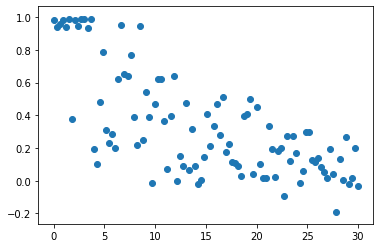

In [399]:
"""MAGNETISATION v. TEMPERATURE"""

x = np.linspace(0.0001, 30, 100)
y = test_data

plt.scatter(x, y)

In [544]:
def generateAvgData(lattice, temp, nAvg = 10, N = 300, quantity = "M"):
    """This is assuredly SUPER inefficient, but I just want to see what a n-sample avg plot looks like"""
    data = []
    for i in range(nAvg):
        vals = metropolis(lattice, temp, N)
        if quantity == "M":
            data.append(measurements(vals)[0])
        elif quantity == "E":
            data.append(measurements(vals)[1])
    avgData = np.average(data)
    return avgData

In [414]:
temps = np.linspace(0.0001, 40, 100)
plot_data_avg = [generateAvgData(lattice_initial, temp) for temp in temps]

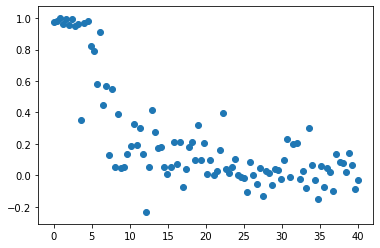

In [415]:
plt.scatter(temps, plot_data_avg)

In [416]:
temps_rough = np.linspace(0.0001, 40, 20)
avg_rough = [generateAvgData(lattice_initial, temp, nAvg = 50) for temp in temps]

In [446]:
#temps_final = np.linspace(0.0001, 40, 100)
#avg_M_final = [generateAvgData(lattice_initial, temp, nAvg = 100, quantity = "M") for temp in temps]
#avg_E_final = [generateAvgData(lattice_initial, temp, nAvg = 100, quantity = "E") for temp in temps]

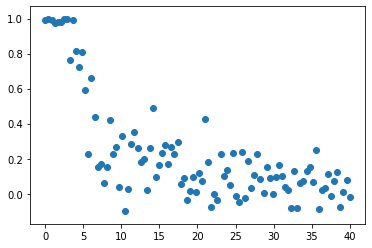

In [425]:
plt.scatter(temps, avg_rough)

In [437]:
temps_energy = np.linspace(0.0001, 40, 20)

energy_test_series = [generateAvgData(lattice_initial, temp, quantity = "E") for temp in temps_energy]

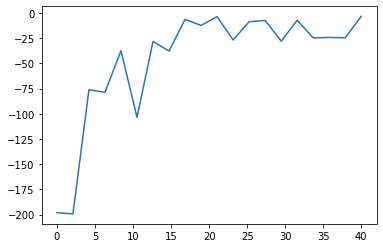

In [475]:
"""ENERGY V. TEMP"""
plt.plot(temps_energy, energy_test_series)

In [476]:
"""NAIVE ATTEMPT #1"""
def specificHeat(temps, energies, nParticles = 25):
    arrayC = []
    for i in range(len(energies)-1):
        delta_temp = temps[i+1] - temps[i]
        delta_energy = energies[i+1] - energies[i]
        valC = delta_energy / (delta_temp * nParticles) 
        arrayC.append(valC)
    return arrayC

In [477]:
np.average(specificHeat(temps_energy, energy_test_series))

0.19488048720121812

In [478]:
C1 = np.average(specificHeat(temps_energy, energy_test_series)[0:1])
C2 = np.average(specificHeat(temps_energy, energy_test_series)[1:3])
C3 = np.average(specificHeat(temps_energy, energy_test_series)[3:10])
C4 = np.average(specificHeat(temps_energy, energy_test_series)[10:20])

In [479]:
C1, C2, C3, C4
temps_energy[1:5]

array([2.10535789, 4.21061579, 6.31587368, 8.42113158])

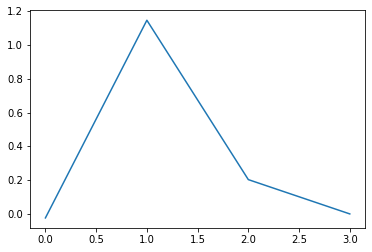

In [480]:
plt.plot(range(4), (C1, C2, C3, C4)) #"Specific heat plot"

In [461]:
eTemps_final = np.linspace(0.0001, 40, 50)

eFinal = [generateAvgData(lattice_initial, temp, quantity = "E") for temp in eTemps_final]

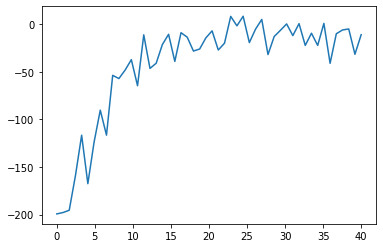

In [465]:
"""Energy v. Temp"""
plt.plot(eTemps_final, eFinal)

In [481]:
C1 = np.average(specificHeat(eTemps_final, eFinal)[0:1])
C2 = np.average(specificHeat(eTemps_final, eFinal)[1:7])
C3 = np.average(specificHeat(eTemps_final, eFinal)[7:20])
C4 = np.average(specificHeat(eTemps_final, eFinal)[20:40])

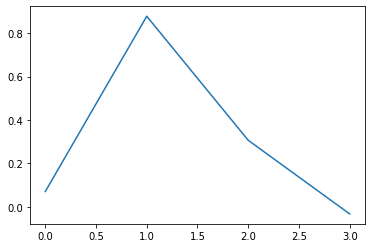

In [482]:
"""Ranged average of C (in various phases) vs. temperature"""
plt.plot(range(4), (C1, C2, C3, C4)) #"Specific heat plot"

In [542]:
#plt.plot(eTemps_final[0:49], specificHeat(eTemps_final, eFinal))

In [539]:
"""NAIVE ATTEMPT #2"""
#def moreSpecificHeat(temps, energies):
#    return np.gradient(energies, temps)

'NAIVE ATTEMPT #2'

In [540]:
#plt.plot(eTemps_final, moreSpecificHeat(eTemps_final, eFinal))

In [533]:
"""ATTEMPT NUMBER 3"""
lat = randomlattice(5, 5)
temp_range = np.linspace(0.01, 3, 20)
arrayC = []
for temp in temp_range:
    arrayC.append(fullMeasurements(lat, 100)[2])

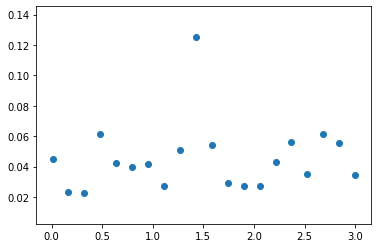

In [536]:
"""SPECIFIC HEAT vs. temperature"""
plt.scatter(temp_range, arrayC)

In [578]:
"""EXTRA TIDBIT for sanity"""
def generateAvgC(lattice, temp, nAvg = 10, N = 300, quantity = "M", manual = False):
    """This is assuredly SUPER inefficient, but I just want to see what a n-sample avg plot looks like"""
    data = []
    for i in range(nAvg):
        data.append(fullMeasurements(lat, 100, manual_eq = manual)[2])
    avgC = np.average(data)
    return avgC

In [579]:
avgC_temps = np.linspace(1.5, 6, 20)

avgC_array = [generateAvgC(lat, temp, manual = True) for temp in avgC_temps]

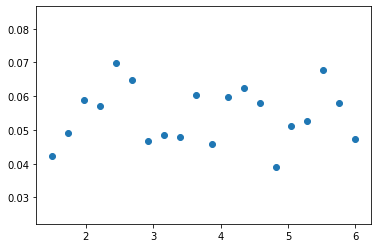

In [580]:
plt.scatter(avgC_temps, avgC_array)